<a href="https://colab.research.google.com/github/Kosuke20020715/Data-Analytics/blob/main/E_mail_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-mail Classification

## 目的
通信技術の発展により、様々なコミュニケーションツールが登場してきた。しかし、メールという媒体は依然として個人や企業、教育機関にとっても不可欠な存在である。特に課題となっていることは、メールの中でも個人情報を抜き取ることを目的としたスパムメールである。スパムメールが原因で情報漏洩やウイルス感染、ネットワークを通じたシステムの破壊などの悪影響を及ぼしている。<p>
そこで、今回は実際のメールのデータやその種類からスパムメールを分類するというタスクを通じて実際のシステムへの導入を検討する。<p>
https://www.kaggle.com/datasets/ethancratchley/email-phishing-dataset


### データの理解

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/email_phishing_data.csv')
df.head(5)

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [4]:
df.info

<bound method DataFrame.info of         num_words  num_unique_words  num_stopwords  num_links  \
0             140                94             52          0   
1               5                 5              1          0   
2              34                32             15          0   
3               6                 6              2          0   
4               9                 9              2          0   
...           ...               ...            ...        ...   
524841        782               327            301          2   
524842         36                30             11          0   
524843         61                46             11          0   
524844        213               136             89          0   
524845         26                24              3          0   

        num_unique_domains  num_email_addresses  num_spelling_errors  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
524841                   2                    2                   52   
524842                   0                    0                    4   
524843                   0                    0                    3   
524844                   0                    0                   18   
524845                   0                    0                    2   

        num_urgent_keywords  label  
0                         0      0  
1                         0      0  
2                         0      0  
3                         0      0  
4                         0      0  
...                     ...    ...  
524841                    1      0  
524842                    0      1  
524843                    0      0  
524844                    0      0  
524845                    0      0  

[524846 rows x 9 columns]>

Inputデータは次のように分類される。<p>
・**説明変数** : num_words/num_unique_words/num_stopwords/num_links/num_unique_domains/num_email_addresses/num_spelling_errors/num_urgent_keywords<p>
・**目的変数** : label <p>
また、各パラメータは次のような意味合いを持っている。<p>
・num_words : メール本文の文字数<p>
・num_unique_words : 特有の単語の使用数<p>
・num_stopwords : 助詞や助動詞のように意味をなさない単語数<p>
・num_links : ハイパーリンク数<p>
・num_unique_domains : 特有のドメイン数<p>
・num_email_addresses : 本文内のメールアドレス数<p>
・num_spelling_errors : スペルミス数<p>
・num_urgent_keywords : 重要な単語数(例："最新の"/"大事な")<p>
・label : スパムメールか否か

## EDA

### 欠損値の確認

In [5]:
df_null = df.isnull().sum()
df_null

,0
num_words,0
num_unique_words,0
num_stopwords,0
num_links,0
num_unique_domains,0
num_email_addresses,0
num_spelling_errors,0
num_urgent_keywords,0
label,0


欠損値は今回使用するデータセットには含まれていないことがわかる.


### データ型の確認

In [6]:
df.dtypes

,0
num_words,int64
num_unique_words,int64
num_stopwords,int64
num_links,int64
num_unique_domains,int64
num_email_addresses,int64
num_spelling_errors,int64
num_urgent_keywords,int64
label,int64


ここから、すべてのデータが整数であることが確認された

In [7]:
#データ全体の確認
df_des = df.describe()
df_des

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,5.248460e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.762280e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301,0.013240
std,3.335457e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320,0.114301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.690000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000,1.000000


### 分布の確認

#### 1. num_words

<function matplotlib.pyplot.show(close=None, block=None)>

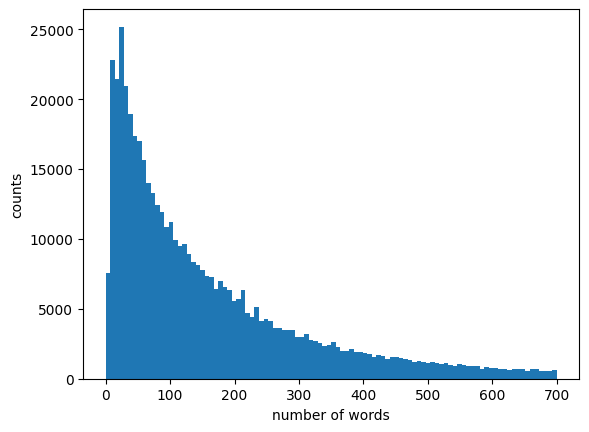

In [8]:
plt.hist(df['num_words'], range=(0,7e+02),bins=100)
plt.xlabel('number of words')
plt.ylabel('counts')
plt.show

#### 2. num_unique_numbers


<function matplotlib.pyplot.show(close=None, block=None)>

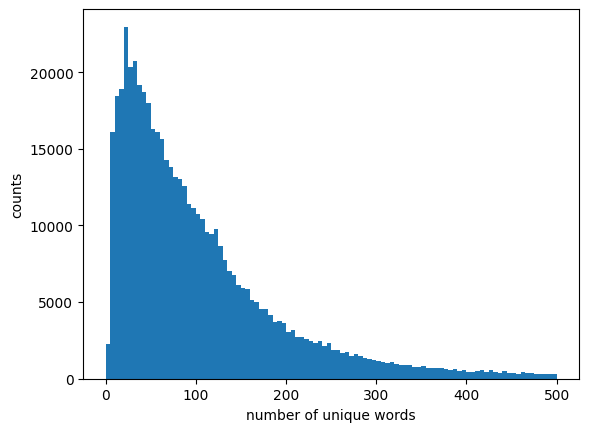

In [9]:
plt.hist(df['num_unique_words'], range=(0,5e+02),bins=100)
plt.xlabel('number of unique words')
plt.ylabel('counts')
plt.show

#### 3. num_stopwords

<function matplotlib.pyplot.show(close=None, block=None)>

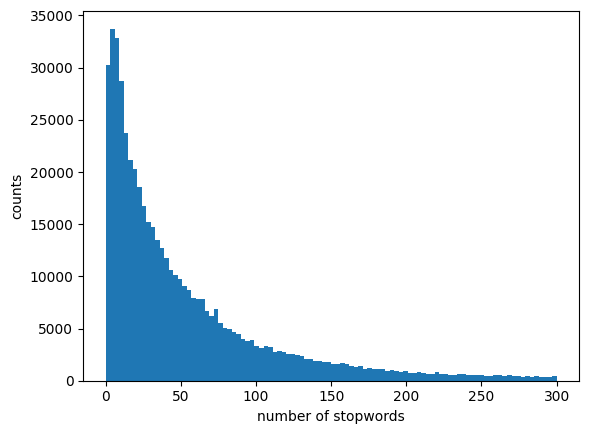

In [10]:
plt.hist(df['num_stopwords'], range=(0,3e+02),bins=100)
plt.xlabel('number of stopwords')
plt.ylabel('counts')
plt.show


#### 4. num_links

<function matplotlib.pyplot.show(close=None, block=None)>

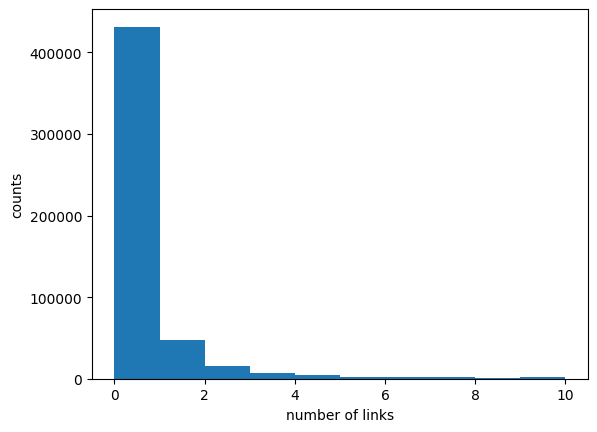

In [11]:
plt.hist(df['num_links'], range=(0,1e+01))
plt.xlabel('number of links')
plt.ylabel('counts')
plt.show

#### 5. num_unique_domains

<function matplotlib.pyplot.show(close=None, block=None)>

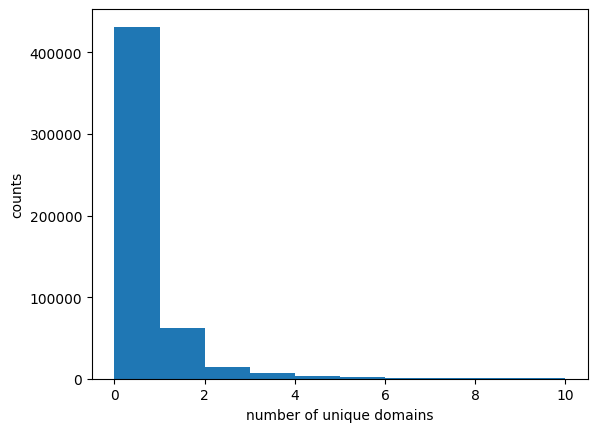

In [12]:
plt.hist(df['num_unique_domains'], range=(0,1e+01))
plt.xlabel('number of unique domains')
plt.ylabel('counts')
plt.show

#### 6. num_email_addresses

<function matplotlib.pyplot.show(close=None, block=None)>

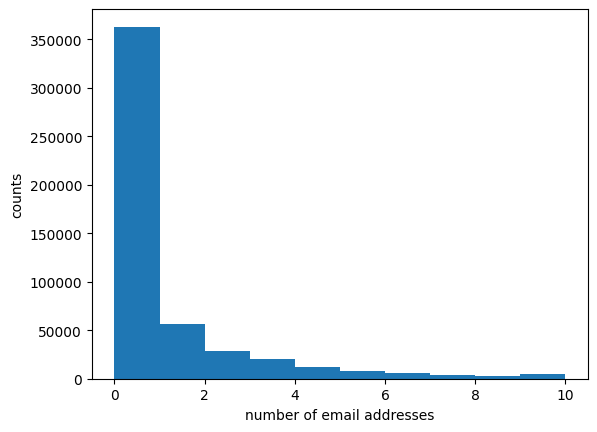

In [13]:
plt.hist(df['num_email_addresses'], range=(0,1e+01))
plt.xlabel('number of email addresses')
plt.ylabel('counts')
plt.show

#### num_spelling_errors


<function matplotlib.pyplot.show(close=None, block=None)>

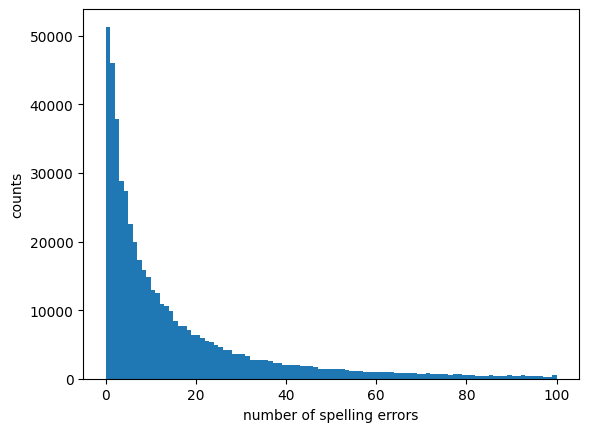

In [14]:
plt.hist(df['num_spelling_errors'], range=(0,1e+02), bins=100)
plt.xlabel('number of spelling errors')
plt.ylabel('counts')
plt.show

#### 7. num_urgent_keywords

<function matplotlib.pyplot.show(close=None, block=None)>

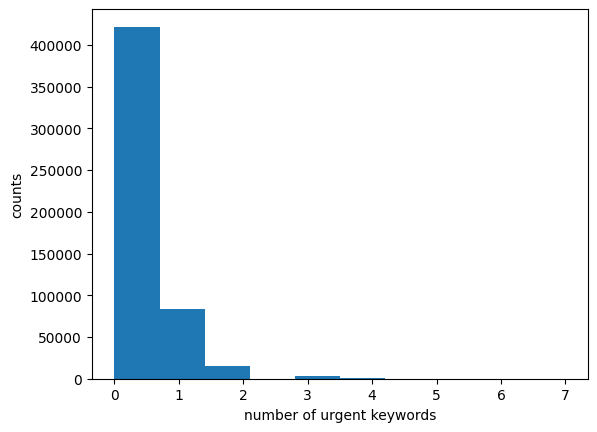

In [15]:
plt.hist(df['num_urgent_keywords'], range=(0,7))
plt.xlabel('number of urgent keywords')
plt.ylabel('counts')
plt.show

#### 8. label

<function matplotlib.pyplot.show(close=None, block=None)>

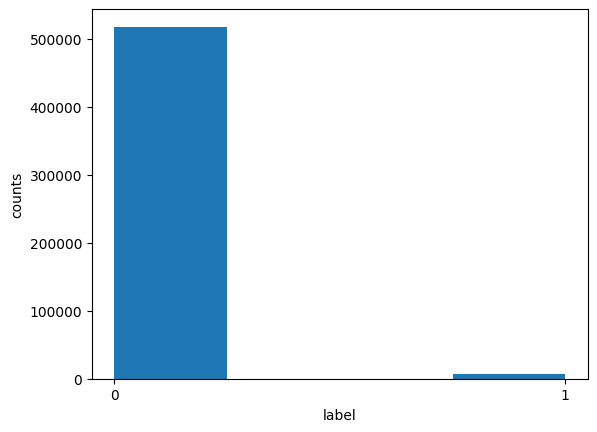

In [16]:
plt.hist(df['label'], range=(0,1),bins=4)
plt.xticks([0,1])
plt.xlabel('label')
plt.ylabel('counts')
plt.show

### 外れ値の確認

上のヒストグラムで最頻値が0であるものを除き、外れ値を可視化した。

<function matplotlib.pyplot.show(close=None, block=None)>

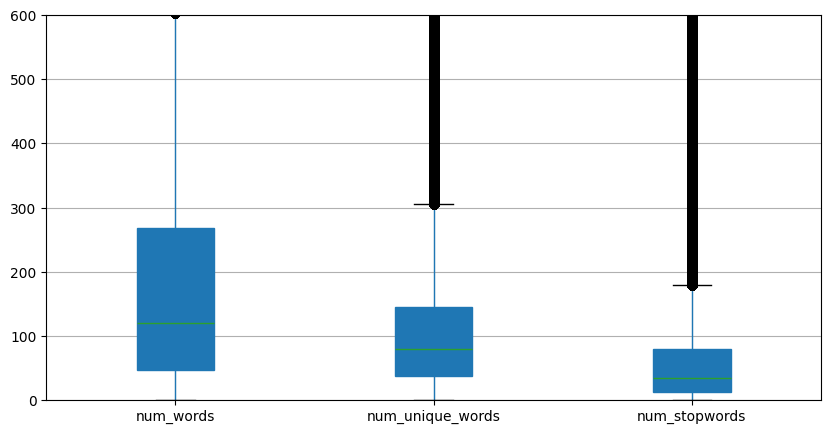

In [17]:
plt.figure(figsize=(10,5))
plt.ylim ([0,6e+2])
df[['num_words','num_unique_words','num_stopwords']].boxplot(patch_artist=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

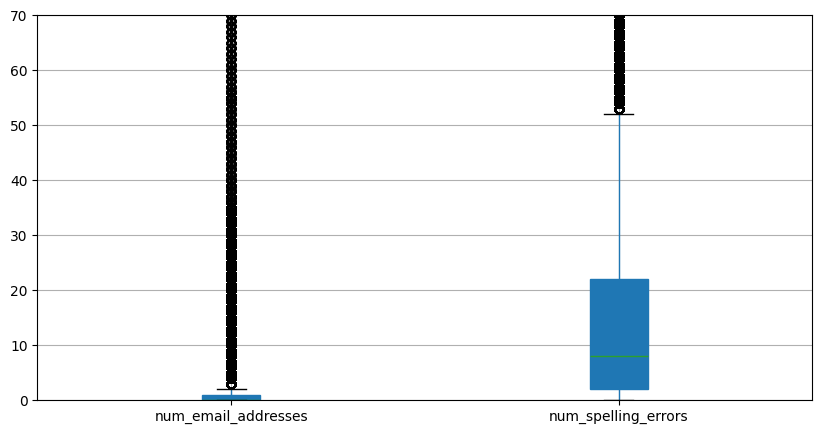

In [18]:
plt.figure(figsize=(10,5))
plt.ylim ([0,7e+1])
df[['num_email_addresses','num_spelling_errors']].boxplot(patch_artist=True)
plt.show

### 相関の確認

<function matplotlib.pyplot.show(close=None, block=None)>

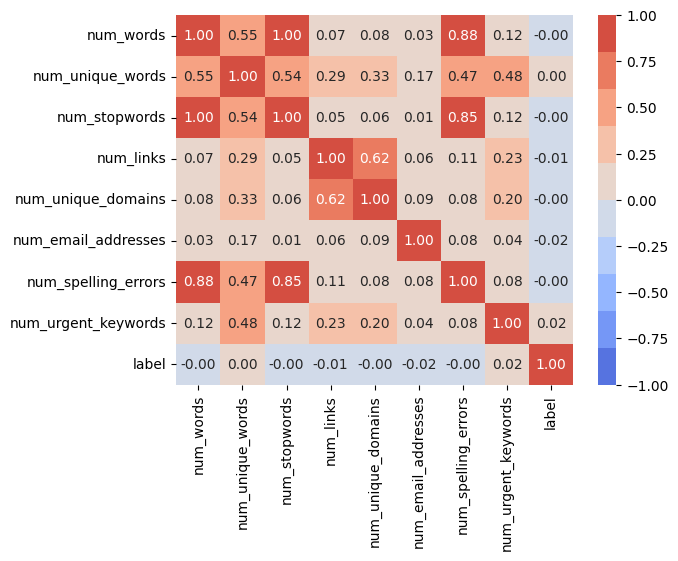

In [19]:
import seaborn as sns
df_corr = df.corr()
sns.heatmap(df_corr,cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)
plt.show

#### 分散の確認

In [20]:
# sns.pairplot(df, hue='label', palette="husl")

### 外れ値の除去

In [21]:
Q1 = df_des.loc["25%"][:]
Q3 = df_des.loc["75%"][:]
lQR = Q3-Q1
out1 = Q1-1.5*lQR
out2 = Q3+1.5*lQR

df_drop = df.drop("label", axis=1)
columns = df_drop
for column in columns:
  new_df = df_drop[(df_drop[column]>=out1[column])&(df_drop[column]<=out2[column])]
new_df.describe()


,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords
count,421833.000000,421833.000000,421833.000000,421833.000000,421833.000000,421833.000000,421833.000000,421833.0
mean,168.813469,90.763866,48.556078,0.432207,0.219833,1.851583,17.301337,0.0
std,251.577444,99.775218,69.256395,2.674229,0.906785,13.016756,71.773764,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,39.000000,32.000000,10.000000,0.000000,0.000000,0.000000,2.000000,0.0
50%,94.000000,65.000000,26.000000,0.000000,0.000000,0.000000,6.000000,0.0
75%,206.000000,119.000000,60.000000,0.000000,0.000000,1.000000,18.000000,0.0
max,23902.000000,13986.000000,3030.000000,245.000000,99.000000,981.000000,19239.000000,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

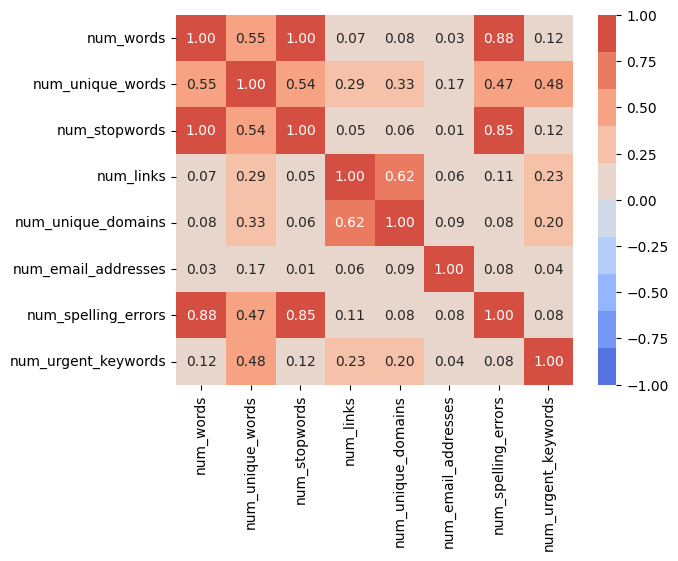

In [22]:
df_drop_corr = df_drop.corr()
sns.heatmap(df_drop_corr,cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)
plt.show

## モデルの構築

今回分類問題に使用するモデルは、"Random Forest" / "SVM" であり, スコアを比較する

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
df["label"]

,label
0,0
1,0
2,0
3,0
4,0
...,...
524841,0
524842,1
524843,0
524844,0


Model: SVM
Accuracy: 98.67%


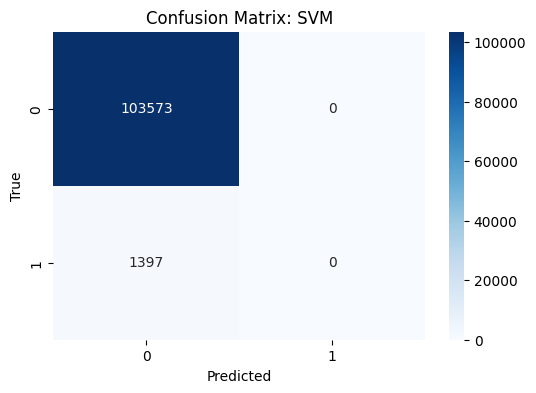

Model: Random Forest
Accuracy: 98.98%


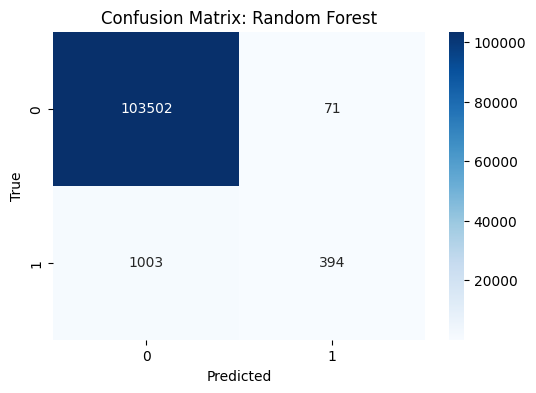

In [26]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

X = df_drop
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {"SVM": SVC(),
          "Random Forest": RandomForestClassifier()}
#Compare for each model
for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  print(f"Model: {model_name}")
  print(f"Accuracy: {accuracy * 100:.2f}%")
  # Plot Confusion Matrix
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
  plt.title(f"Confusion Matrix: {model_name}")
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

## データの分析


上例では、**1. Support Vector Machine** と **2. Random Forest**  の2つのモデルを用いて分類問題の精度を比較した。正答率については、**Random Forest の方が高い**結果となった。両者とも高い精度を出すことができた原因は、目的変数(label)の大半が0であり、予測が容易であるからであると考えられる。両者の大きな相違点は、"**1の予測に対して1が正解である**"場合の正答率である。SVMでは、サンプル数が少ないデータの予測が一切できていないのに対して、Random Forestでは少数のデータ予測ができている。これは、Random Forestではアンサンブルの効果により、一部の決定木で少数のラベルに対するデータが目立ちやすくなることや、ブートストラッピングにより偶然少数データを見つけることができることなどが挙げられる。一方で、SVMではクラス間の境界を最大化することを目的としており、クラスの偏りに大きく左右されてしまうことが今回のような結果に起因している。<p>
今回の例のように、スパムメールの分類を行う上で、スパムメール(label:1)を予測することは極めて重要であり、モデルとしてはRandom Forestを使用すべきであることがいえる。

